In [1]:
#Importing necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

crops = pd.read_csv('state-wise-crop-production-India.csv')
crops.head()

,State,Year,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Arecanut,4354.0,7200.0
1,Andaman and Nicobar Islands,2000,Banana,1707.0,12714.0
2,Andaman and Nicobar Islands,2000,Cashewnut,800.0,219.0
3,Andaman and Nicobar Islands,2000,Coconut,25160.0,89000000.0
4,Andaman and Nicobar Islands,2000,Dry ginger,388.0,1220.0


In [2]:
#Question 1

#Series of average production of each crop till date
avg_each_crop = crops.groupby('Crop').Production.mean().sort_values(ascending=False)
#Series of average crop production during each year
avg_each_year = crops.groupby('Year').Production.mean()
#Series of each state's average crop production over successive years
avg_each_state = crops.groupby('State').Production.mean().sort_values(ascending=False)
#Total average crop production in India 
total_avg = crops.Production.mean()

print("AVERAGE PRODUCTION OF DIFFERENT CROPS:\n", avg_each_crop.head(), end="\n\n")
print("AVERAGE CROP PRODUCTION IN DIFFERENT YEARS:\n", avg_each_year.head(), end="\n\n")
print("AVERAGE CROP PRODUCTION IN EACH STATE:\n", avg_each_state.head(), end="\n\n")
print("TOTAL AVERAGE PRODUCTION:", total_avg)

AVERAGE PRODUCTION OF DIFFERENT CROPS:
 Crop
Coconut      9.230316e+08
Sugarcane    1.121993e+07
Wheat        3.136744e+06
Rice         3.074956e+06
Paddy        2.785651e+06
Name: Production, dtype: float64

AVERAGE CROP PRODUCTION IN DIFFERENT YEARS:
 Year
2000    9.465958e+06
2001    9.848998e+06
2002    7.894313e+06
2003    8.239306e+06
2004    1.059439e+07
Name: Production, dtype: float64

AVERAGE CROP PRODUCTION IN EACH STATE:
 State
Kerala                         2.550271e+08
Andhra Pradesh                 2.537070e+07
Tamil Nadu                     2.309088e+07
Andaman and Nicobar Islands    7.722831e+06
Goa                            6.921907e+06
Name: Production, dtype: float64

TOTAL AVERAGE PRODUCTION: 11154093.940590419


In [3]:
#Question 2
max_crop_index = (crops.Production/crops.Area).idxmax()
crops.loc[max_crop_index, 'Crop']

'Sugarcane'

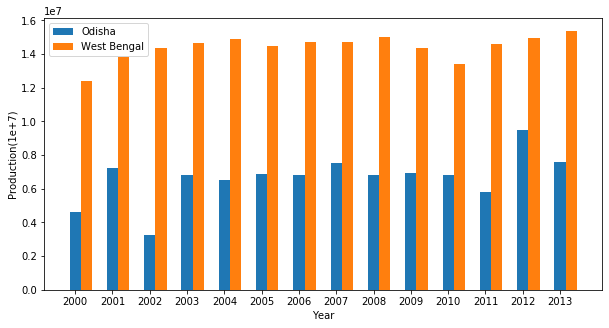

[[1.         0.44647268]
 [0.44647268 1.        ]]


In [4]:
#Question 3
x = np.arange(2000, 2014)
y1 = crops.loc[(crops.State=='Odisha') & (crops.Crop=='Rice')].groupby('Year').Production.sum().to_numpy()
y2 = crops.loc[(crops.State=='West Bengal') & (crops.Crop=='Rice')].groupby('Year').Production.sum().to_numpy()

w = 0.3
bar2 = [i+w for i in x]
plt.figure(figsize=(10,5))
plt.bar(x, y1, w, label='Odisha')
plt.bar(bar2, y2, w, label='West Bengal')
plt.xlabel('Year')
plt.ylabel('Production(1e+7)')
plt.xticks(x)
plt.legend()
plt.show()

print(np.corrcoef(y1, y2))

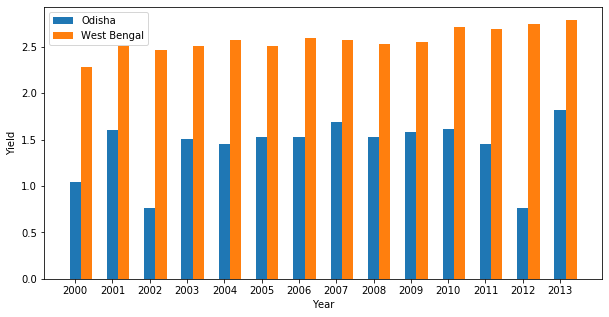

In [32]:
a1 = crops.loc[(crops.State=='Odisha') & (crops.Crop=='Rice')].groupby('Year').Area.sum().to_numpy()
a2 = crops.loc[(crops.State=='West Bengal') & (crops.Crop=='Rice')].groupby('Year').Area.sum().to_numpy()

yield1 = y1/a1
yield2 = y2/a2

w = 0.3
bar2 = [i+w for i in x]
plt.figure(figsize=(10,5))
plt.bar(x, yield1, w, label='Odisha')
plt.bar(bar2, yield2, w, label='West Bengal')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.xticks(x)
plt.legend()
plt.show()

In [5]:
#Question 4
max_wheat_index = crops[crops.Crop=='Wheat'].Production.idxmax()
crops.loc[max_wheat_index, 'State']

'Uttar Pradesh'

# Question 5

In [16]:
x1 = crops.loc[(crops.State=='Andhra Pradesh') & (crops.Crop=='Rice')].groupby('Year').Production.sum()
x2 = crops.loc[(crops.State=='Uttar Pradesh') & (crops.Crop=='Rice')].groupby('Year').Production.sum()
x3 = crops.loc[(crops.State=='Tamil Nadu') & (crops.Crop=='Rice')].groupby('Year').Production.sum()

x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)

print("Andhra Pradesh(2000-13)\n", x1)
print("\nUttar Pradesh(2000-13)\n", x2)
print("\nTamil Nadu(2000-13)\n", x3)

Andhra Pradesh(2000-13)
 [8040667. 7823692. 5315408. 6054099. 7392678. 7288721. 7616392. 8880000.
 8880586. 7569071. 7883078. 7744175. 6862854. 7993425.]

Uttar Pradesh(2000-13)
 [11679149. 12855857.  9596346. 12494939. 10749989. 11119095. 11123613.
 11780112. 13097031. 10776504. 11992299. 14022392. 14415939. 14635836.]

TamilNadu(2000-13)
 [7217903. 6583630. 3577108. 3222776. 5061622. 5209433. 6610607. 5039954.
 5183385. 5665258. 5792415. 7458657. 4050334. 7115195.]


In [14]:
def training_set(time_series):
    X = []
    y = []
    
    for i in range(len(time_series)-3):
        X.append(time_series[i:i+3])
        y.append(time_series[i+3])
    
    return np.array(X), np.array(y)

In [15]:
x1_train, y1_train = training_set(x1)
x2_train, y2_train = training_set(x2)
x3_train, y3_train = training_set(x3)

x1_train = x1_train.reshape((x1_train.shape[0], x1_train.shape[1], 1))
x2_train = x2_train.reshape((x2_train.shape[0], x2_train.shape[1], 1))
x3_train = x3_train.reshape((x3_train.shape[0], x3_train.shape[1], 1))

In [17]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM

model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(3,1)),
    LSTM(50, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer='adam',loss='mse')

In [19]:
model.fit(x1_train, y1_train, epochs=1000, verbose=0)
model.fit(x2_train, y2_train, epochs=1000, verbose=0)
model.fit(x3_train, y3_train, epochs=1000, verbose=0)

In [25]:
x1_test = np.array(x1[-3:])
x2_test = np.array(x2[-3:])
x3_test = np.array(x3[-3:])

x1_test = x1_test.reshape(-1,3,1)
x2_test = x2_test.reshape(-1,3,1)
x3_test = x3_test.reshape(-1,3,1)

y1_pred = model.predict(x1_test)
y2_pred = model.predict(x2_test)
y3_pred = model.predict(x3_test)

print("Prediction of rice production in 2014\n")
print("Andhra Pradesh:", y1_pred[0][0])
print("Uttar Pradesh:", y2_pred[0][0])
print("Tamilnadu:", y3_pred[0][0])

Prediction of rice production in 2014

Andhra Pradesh: 8903337.0
Uttar Pradesh: 17154456.0
Tamilnadu: 9567241.0
